# Analysis of cycling in Glasgow pre and post COVID-19 pandemic

## Introduction

There has been a paradigm shift towards more sustainable urban transports modes, such as active travel. These have been increasingly influenced by the COVID-19 pandemic, being adopted, and becoming more popular post pandemic. Cycling, rather than travel by motorized transport, is seen as a way of achieving more sustainable urban environments (Banister, 2008). Cities are becoming more predominant in modern societies. According to the (World Health Organization, 2016), the percentage of the world’s population living in urban areas is projected to increase from 54% in 2015 to 60% in 2030 and to 66% by 2050. Many cities are currently experiencing traffic congestion and pollution due to increased motorization (UITP, 2015). Hence, alternative modes of transportation are mandatory towards improving people’s mobility and accessibility of key services. This growing demand for urban transport cycling is a reflection of the realization of the limitations of automobile-dependent transport planning, in terms of climate change and road traffic injury (Hickman, 2013).

Contemporary research shows that cycling has largely positive impacts for people and the places where they live. It can improve their well-being, lessen their spend on travel, and enhance the liveability of their environment. This can be shown to reduce car travel, the combination of health benefits and reduced congestion and pollution. The far-reaching benefits of cycling cannot be overlooked by policy makers with bespoke city specific solutions required in order to achieve sustainability. Aligned with (United Nations, 2015), Sustainable Development Goal (SGD) 11 - Sustainable Cities and Communities, Transport Scotland, (2014) aims to integrate active travel into public transport to provide an attractive alternative to car use. 

Majority of Scotland’s population lives in urban areas, and a high proportion of trips are over short distances.  According to (Transport Scotland, 2019), 54% of all trips in Scotland, in 2019 , were under 5 km and 34% of journeys less than 1 km were made by car. This could potentially have been cycled but the reality is different.

Through its Strategic Plan for Cycling 2016-2025 (SusTrans, 2015), Glasgow City Council aims to increase levels of cycling – for leisure, as a mode of transport and for sport. One intervention which has been deployed in many cities is improving cycling infrastructure e.g., segregated cycle lanes, bicycle parking etc. Over the recent past, Glasgow has seen increased number of cycling facilities due to increased investment in cycling infrastructure. Initiatives such as the Avenue Project (Glasgow City Council, 2018), aim to deliver an integrated network of continuous pedestrian and cycle routes across the city center and into other areas of Glasgow.

There are questions about both the postulated short- and long-term impacts of COVID on active travel patterns. This study sets out to explore the impact of COVID-19 on cycling levels across in Glasgow, by carrying out a time series analysis of cycling pre and post the pandemic. 

Aims and research questions
The overarching aim of this study is to describe, analyze and interpret changing trends in cycling in Glasgow that resulted from the COVID-19 pandemic.
The following research questions are addressed:

i.   What is the cycling volume in Glasgow pre and post pandemic?

ii.  How did cycling levels change in the period from 2019 to 2022?

iii. How does datazone deprivation index impact the cycling levels?


## Methodology

### Data Collection

Data was obtained from a range of organizations that support and promote active travel, SusTrans, Glasgow City Council and Cycling Scotland, that have permanent and temporary cycling monitoring infrastructure in different locations in Scotland. The count data came from the National Monitoring Framework dataset available on an open data portal maintained by Cycling Scotland https://usmart.io/org/cyclingscotland/discovery/discovery-view-detail/2d0d20d6-ff8e-47a8-8fc8-10580e00a052. This data set is a real-time daily upload from each cycling counter that is part of the National Monitoring Framework. The three datasets were merged and the combined dataset yielded bicycle user counts from 95 counter locations within the different datazones in Glasgow.

Additionally, deprivation index data was obtained from the Scottish Index of Multiple Deprivation 2020 and this was merged with the location geo-dataframe to get the deprivation of the datazone within which the counters are located.



In [85]:
import pandas as pd
import numpy as np
import os
import string

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [87]:
os.chdir('D:\MSc Urban Transport\PTUA\PTUA2023\Assignment')

In [88]:
df1 = pd.read_csv('Data/cycling_Scotland.csv', parse_dates =[0], 
                 infer_datetime_format=True)
df1.head()

,provider,area,siteID,location,latitude,longitude,startTime,endTime,count,usmart_id
0,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.854410,-4.256008,01/01/2019,02/01/2019,0,e1a836e388eac95a071bc4062156178f
1,Cycling Scotland,Glasgow,GLG0009,"Glasgow, Parson Street",55.865671,-4.237144,01/01/2019,02/01/2019,0,97f19098a5488aac2c5d5adc0b486d1e
2,Cycling Scotland,Glasgow,GLG0015,"Glasgow, Clyde Street",55.853351,-4.247201,01/01/2019,02/01/2019,0,35075798dee7c63a1e2a3522475991d4
3,Cycling Scotland,Glasgow,GLG0032,"Glasgow, Bridgegate",55.854905,-4.247123,01/01/2019,02/01/2019,0,167814a3166a08f3605442dacf0b1b6c
4,Cycling Scotland,Glasgow,GLG0083,"Glasgow, Clyde Tunnel Southbound",55.873020,-4.328700,01/01/2019,02/01/2019,24,69a4715a0b7bcfc98b9e158ecb7bf207


In [89]:
df2 = pd.read_csv('Data/GCC.csv', parse_dates =[0], 
                 infer_datetime_format=True)
df2.head()

,area,provider,latitude,count,siteID,location,startTime,endTime,longitude,usmart_id
0,Glasgow,Glasgow City Council,55.84980,120,GLG0006,CP Shields Road / Scotland Street,01/01/2019,02/01/2019,-4.27640,c8d325a3c733bc0f08e6d235aadf02d7
1,Glasgow,Glasgow City Council,55.85215,82,GLG0034,Albert Bridge,01/01/2019,02/01/2019,-4.24776,098d2df6c76d82ec892337453e03b013
2,Glasgow,Glasgow City Council,55.86542,88,GLG0035,Bath Street,01/01/2019,02/01/2019,-4.26999,c974c3c80fb9380ab1f35b2651819933
3,Glasgow,Glasgow City Council,55.86300,25,GLG0036,St. Vincent Street (East/West),01/01/2019,02/01/2019,-4.26959,f7a8a83db889180fefa790993936845c
4,Glasgow,Glasgow City Council,55.86288,23,GLG0037,St. Vincent Street (Southbound),01/01/2019,02/01/2019,-4.26956,99a98bac902f0c3a7cad568c3853ba0a


In [90]:
df3 = pd.read_csv('Data/Sustrans.csv', parse_dates =[0], 
                 infer_datetime_format=True)
df3.head()

,provider,area,siteID,location,latitude,longitude,startTime,endTime,count,usmart_id
0,Sustrans,Glasgow,SUS5658,"Glasgow, NCN75 (Glasgow Green)",55.84924,-4.23793,01/01/2019,02/01/2019,0,52b191702ee4a6b8093e8c4bf5584db6
1,Sustrans,Glasgow,SUS5659,"Glasgow, NCN75 (Cuningar)",55.84224,-4.20686,01/01/2019,02/01/2019,0,00ddb6ca2ac5f2c40ef5d03c7d4ae5e4
2,Sustrans,Glasgow,SUS5658,"Glasgow, NCN75 (Glasgow Green)",55.84924,-4.23793,02/01/2019,03/01/2019,0,b6e098f7ef581484c561648103fde8ce
3,Sustrans,Glasgow,SUS5659,"Glasgow, NCN75 (Cuningar)",55.84224,-4.20686,02/01/2019,03/01/2019,0,f8b77eb191ee3024bdd441bf67b740a6
4,Sustrans,Glasgow,SUS5658,"Glasgow, NCN75 (Glasgow Green)",55.84924,-4.23793,03/01/2019,04/01/2019,0,9adf4954c995681a017b9de3bf5a1db0


In [91]:
df_12 = pd.merge(df1, df2, how = 'outer')
df_12

,provider,area,siteID,location,latitude,longitude,startTime,endTime,count,usmart_id
0,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.854410,-4.256008,01/01/2019,02/01/2019,0,e1a836e388eac95a071bc4062156178f
1,Cycling Scotland,Glasgow,GLG0009,"Glasgow, Parson Street",55.865671,-4.237144,01/01/2019,02/01/2019,0,97f19098a5488aac2c5d5adc0b486d1e
2,Cycling Scotland,Glasgow,GLG0015,"Glasgow, Clyde Street",55.853351,-4.247201,01/01/2019,02/01/2019,0,35075798dee7c63a1e2a3522475991d4
3,Cycling Scotland,Glasgow,GLG0032,"Glasgow, Bridgegate",55.854905,-4.247123,01/01/2019,02/01/2019,0,167814a3166a08f3605442dacf0b1b6c
4,Cycling Scotland,Glasgow,GLG0083,"Glasgow, Clyde Tunnel Southbound",55.873020,-4.328700,01/01/2019,02/01/2019,24,69a4715a0b7bcfc98b9e158ecb7bf207
...,...,...,...,...,...,...,...,...,...,...
91801,Glasgow City Council,Glasgow,GLG0356,CP Maryhill Road North Woodside Road,55.875290,-4.271410,30/12/2022,31/12/2022,3,ef93cdc2eec8fb73b64a66a14ca849cb
91802,Glasgow City Council,Glasgow,GLG0356,CP Maryhill Street North Woodside Road,55.875290,-4.271410,30/12/2022,31/12/2022,3,0c980b7de77745d3b9876f53de481e61
91803,Glasgow City Council,Glasgow,GLG0377,Garscube Road Cycle (DISPLAY),55.871063,-4.260541,30/12/2022,31/12/2022,0,1a0905fa5fc7609e5647e48f3bcd5894
91804,Glasgow City Council,Glasgow,GLG0378,Glasgow Green Cycle (DISPLAY),55.853080,-4.246717,30/12/2022,31/12/2022,0,336affe319c0625d8ed578c5501cab98


In [92]:
df = pd.merge(df_12, df3, how = 'outer')
df

,provider,area,siteID,location,latitude,longitude,startTime,endTime,count,usmart_id
0,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.854410,-4.256008,01/01/2019,02/01/2019,0,e1a836e388eac95a071bc4062156178f
1,Cycling Scotland,Glasgow,GLG0009,"Glasgow, Parson Street",55.865671,-4.237144,01/01/2019,02/01/2019,0,97f19098a5488aac2c5d5adc0b486d1e
2,Cycling Scotland,Glasgow,GLG0015,"Glasgow, Clyde Street",55.853351,-4.247201,01/01/2019,02/01/2019,0,35075798dee7c63a1e2a3522475991d4
3,Cycling Scotland,Glasgow,GLG0032,"Glasgow, Bridgegate",55.854905,-4.247123,01/01/2019,02/01/2019,0,167814a3166a08f3605442dacf0b1b6c
4,Cycling Scotland,Glasgow,GLG0083,"Glasgow, Clyde Tunnel Southbound",55.873020,-4.328700,01/01/2019,02/01/2019,24,69a4715a0b7bcfc98b9e158ecb7bf207
...,...,...,...,...,...,...,...,...,...,...
94721,Sustrans,Glasgow,SUS5659,"Glasgow, NCN75 (Cuningar)",55.842240,-4.206860,28/12/2022,29/12/2022,26,ca5f2de241359011eeb3b47b3026d01a
94722,Sustrans,Glasgow,SUS5658,"Glasgow, NCN75 (Glasgow Green)",55.849240,-4.237930,29/12/2022,30/12/2022,49,2844587c9102ea4d4cad9dff117085bd
94723,Sustrans,Glasgow,SUS5659,"Glasgow, NCN75 (Cuningar)",55.842240,-4.206860,29/12/2022,30/12/2022,25,7472fd06450ac52947c175b49e3ebbb1
94724,Sustrans,Glasgow,SUS5658,"Glasgow, NCN75 (Glasgow Green)",55.849240,-4.237930,30/12/2022,31/12/2022,40,ac9443be360d96a993b0ebcf17a89760


The dataset contains 94726 observations and 10 attributes.

In [93]:
df.shape

(94726, 10)

 ### Data types

In [94]:
df.dtypes

provider      object
area          object
siteID        object
location      object
latitude     float64
longitude    float64
startTime     object
endTime       object
count          int64
usmart_id     object
dtype: object

In [95]:
print('There are {} unique locations, and they are: {}. \n'.format(df['location'].nunique(), ', '.join(df['location'].unique())))

There are 95 unique locations, and they are: Glasgow, Portland Bridge, Glasgow, Parson Street, Glasgow, Clyde Street, Glasgow, Bridgegate, Glasgow, Clyde Tunnel Southbound, CP Shields Road / Scotland Street, Albert Bridge, Bath Street, St. Vincent Street (East/West), St. Vincent Street (Southbound), Argyle Street (Eastbound), Argyle Street (Westbound), Waterloo Street, Garscube Road, New City Road Underpass, West Graham Street, Renfrew Street (Footbridge), Victoria Bridge, Polmadie Bridge, Elmbank Crescent, Baird Street, Clyde Tunnel Northbound, Millenium Bridge, Bells Bridge (East Side), Bells Bridge (West Side), Ingram Street, Bell Street, Parnie Street, Glasgow Bridge, Broomielaw, Archerhill Road, Clyde Terrace, George V Bridge (Lanes 1-4), George V Bridge (Lanes 5-7), Tradeston Bridge (East Side), Tradeston Bridge (West Side), Trongate, George Street (Eastbound), George Street (Westbound), Cathedral Street, CP Argyle Street / Union Street, CP Sauchiehall Street / North Claremont St

The dataset contains 95 cycling counter locations.

In [96]:
df.location.value_counts()

Glasgow, Portland Bridge            1460
Glasgow, Clyde Tunnel Southbound    1460
Glasgow, NCN75 (Glasgow Green)      1460
Glasgow, Parson Street              1460
Glasgow, NCN75 (Cuningar)           1460
                                    ... 
Garscube Road Cycle (DISPLAY)         44
Maryhill St North Woodside Rd         18
Barrhead Rd Cowglen West              17
Barrhead Rd Cowglen East              17
Argyle St Bunhouse Rd                 17
Name: location, Length: 95, dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94726 entries, 0 to 94725
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   provider   94726 non-null  object 
 1   area       94726 non-null  object 
 2   siteID     94726 non-null  object 
 3   location   94726 non-null  object 
 4   latitude   94726 non-null  float64
 5   longitude  94726 non-null  float64
 6   startTime  94726 non-null  object 
 7   endTime    94726 non-null  object 
 8   count      94726 non-null  int64  
 9   usmart_id  94726 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.9+ MB


The dataset has no missing values, since all the attributes have 94726 instances. However there is no guarantee these values are all consistent thus the the pandas.describe() method is applied in the next section to gather information from the numerical attributes.

The statistical information for the numerical columns is shown as:

In [98]:
df.describe()

,latitude,longitude,count
count,94726.000000,94726.000000,9.472600e+04
mean,55.858005,-4.261107,8.465108e+02
std,0.010910,0.037513,1.785837e+04
min,55.822224,-4.355369,0.000000e+00
25%,55.852413,-4.269990,3.800000e+01
50%,55.858340,-4.263360,1.310000e+02
75%,55.864960,-4.247201,3.340000e+02
max,55.895190,-4.122866,1.138814e+06


The dataset does not contain null values.


In [99]:
df['count'].isnull().sum()

0

### Typecasting the datetime 

In [100]:
df['startTime'] = pd.to_datetime(df.startTime, format = '%d/%m/%Y')
df['year'] = df['startTime'].dt.year
df['month'] = df['startTime'].dt.month
df['day'] = df['startTime'].dt.day
df

,provider,area,siteID,location,latitude,longitude,startTime,endTime,count,usmart_id,year,month,day
0,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.854410,-4.256008,2019-01-01,02/01/2019,0,e1a836e388eac95a071bc4062156178f,2019,1,1
1,Cycling Scotland,Glasgow,GLG0009,"Glasgow, Parson Street",55.865671,-4.237144,2019-01-01,02/01/2019,0,97f19098a5488aac2c5d5adc0b486d1e,2019,1,1
2,Cycling Scotland,Glasgow,GLG0015,"Glasgow, Clyde Street",55.853351,-4.247201,2019-01-01,02/01/2019,0,35075798dee7c63a1e2a3522475991d4,2019,1,1
3,Cycling Scotland,Glasgow,GLG0032,"Glasgow, Bridgegate",55.854905,-4.247123,2019-01-01,02/01/2019,0,167814a3166a08f3605442dacf0b1b6c,2019,1,1
4,Cycling Scotland,Glasgow,GLG0083,"Glasgow, Clyde Tunnel Southbound",55.873020,-4.328700,2019-01-01,02/01/2019,24,69a4715a0b7bcfc98b9e158ecb7bf207,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94721,Sustrans,Glasgow,SUS5659,"Glasgow, NCN75 (Cuningar)",55.842240,-4.206860,2022-12-28,29/12/2022,26,ca5f2de241359011eeb3b47b3026d01a,2022,12,28
94722,Sustrans,Glasgow,SUS5658,"Glasgow, NCN75 (Glasgow Green)",55.849240,-4.237930,2022-12-29,30/12/2022,49,2844587c9102ea4d4cad9dff117085bd,2022,12,29
94723,Sustrans,Glasgow,SUS5659,"Glasgow, NCN75 (Cuningar)",55.842240,-4.206860,2022-12-29,30/12/2022,25,7472fd06450ac52947c175b49e3ebbb1,2022,12,29
94724,Sustrans,Glasgow,SUS5658,"Glasgow, NCN75 (Glasgow Green)",55.849240,-4.237930,2022-12-30,31/12/2022,40,ac9443be360d96a993b0ebcf17a89760,2022,12,30


In [101]:
def season_of_date(startTime):
    year = str(startTime.year)
    seasons = {'spring': pd.date_range(start= year+ '/03/21', end= year+ '/06/20'),
               'summer': pd.date_range(start= year+ '/06/21', end= year+ '/09/22'),
               'autumn': pd.date_range(start= year+ '/09/23', end= year+ '/12/20')}
    if startTime in seasons['spring']:
        return 'spring'
    if startTime in seasons['summer']:
        return 'summer'
    if startTime in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

# Assuming df has a date column of type `datetime`
df['season'] = df.startTime.map(season_of_date)

In [102]:
df['dow']=df['startTime'].dt.dayofweek
df['dayName'] = df['startTime'].dt.day_name()
df['monthName'] = df['startTime'].dt.month_name()
df

,provider,area,siteID,location,latitude,longitude,startTime,endTime,count,usmart_id,year,month,day,season,dow,dayName,monthName
0,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.854410,-4.256008,2019-01-01,02/01/2019,0,e1a836e388eac95a071bc4062156178f,2019,1,1,winter,1,Tuesday,January
1,Cycling Scotland,Glasgow,GLG0009,"Glasgow, Parson Street",55.865671,-4.237144,2019-01-01,02/01/2019,0,97f19098a5488aac2c5d5adc0b486d1e,2019,1,1,winter,1,Tuesday,January
2,Cycling Scotland,Glasgow,GLG0015,"Glasgow, Clyde Street",55.853351,-4.247201,2019-01-01,02/01/2019,0,35075798dee7c63a1e2a3522475991d4,2019,1,1,winter,1,Tuesday,January
3,Cycling Scotland,Glasgow,GLG0032,"Glasgow, Bridgegate",55.854905,-4.247123,2019-01-01,02/01/2019,0,167814a3166a08f3605442dacf0b1b6c,2019,1,1,winter,1,Tuesday,January
4,Cycling Scotland,Glasgow,GLG0083,"Glasgow, Clyde Tunnel Southbound",55.873020,-4.328700,2019-01-01,02/01/2019,24,69a4715a0b7bcfc98b9e158ecb7bf207,2019,1,1,winter,1,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94721,Sustrans,Glasgow,SUS5659,"Glasgow, NCN75 (Cuningar)",55.842240,-4.206860,2022-12-28,29/12/2022,26,ca5f2de241359011eeb3b47b3026d01a,2022,12,28,winter,2,Wednesday,December
94722,Sustrans,Glasgow,SUS5658,"Glasgow, NCN75 (Glasgow Green)",55.849240,-4.237930,2022-12-29,30/12/2022,49,2844587c9102ea4d4cad9dff117085bd,2022,12,29,winter,3,Thursday,December
94723,Sustrans,Glasgow,SUS5659,"Glasgow, NCN75 (Cuningar)",55.842240,-4.206860,2022-12-29,30/12/2022,25,7472fd06450ac52947c175b49e3ebbb1,2022,12,29,winter,3,Thursday,December
94724,Sustrans,Glasgow,SUS5658,"Glasgow, NCN75 (Glasgow Green)",55.849240,-4.237930,2022-12-30,31/12/2022,40,ac9443be360d96a993b0ebcf17a89760,2022,12,30,winter,4,Friday,December


## Data Analysis

### Attributes distributions and trends

#### Annual cycling distribution

In [103]:
yearly_df= df.groupby('year').agg({'count': sum})
yearly_df

,count
year,
2019,4163134
2020,3923495
2021,7293755
2022,64806200


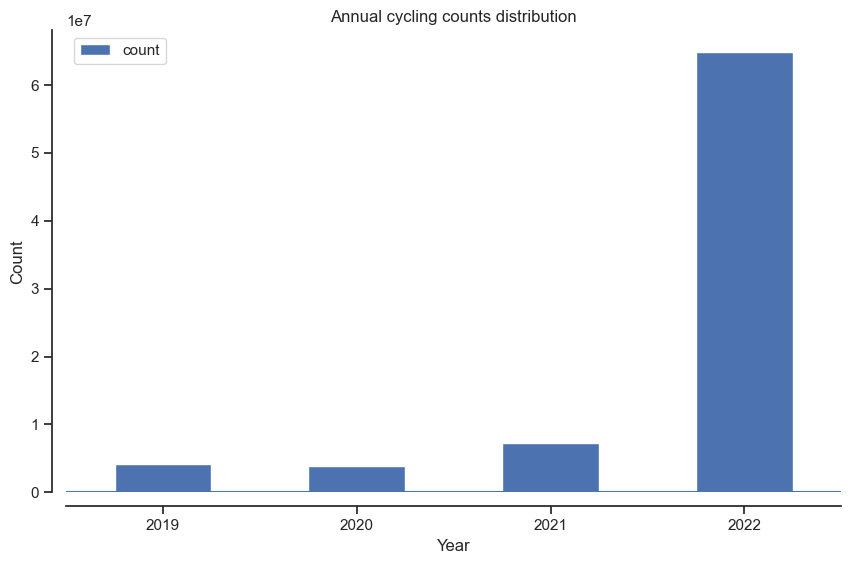

In [149]:
x= df.groupby('year').agg({'count': sum})
x.plot(kind='bar', figsize=(10,6))
plt.hlines(y=1, xmin=-1, xmax=len(x))
plt.title('Annual cycling counts distribution')
plt.xlabel('Year')
plt.ylabel('Count')
sns.despine(offset=10, trim=False)

The bar chart shows a decrease in cycling counts in 2020 after which there is a slight increase beyond post pandemic counts in 2021 and 2022. In 2022, there is an exponential increase as seen with total counts at 64,806,200. 2020, records the lowest cycling counts due to the pandemic. In Scotland, as a COVID-19 countermeasure, the government imposed travel restrictions, lockdowns and stay at home orders throughout different months. On 16th March, the UK government recommended that people 'Work from Home' before imposing a lockdown a week later. These government interventions had substantial impact on people’s lives and their travel behaviour. This reduced movements of people account for the low cycling counts in 2020.

In [105]:
df_year= df.groupby(df['year'])[['count']].mean().sort_values(by= 'year', ascending= True)
df_year.reset_index(inplace= True)
df_year

,year,count
0,2019,231.671341
1,2020,187.323705
2,2021,265.401172
3,2022,2287.627520


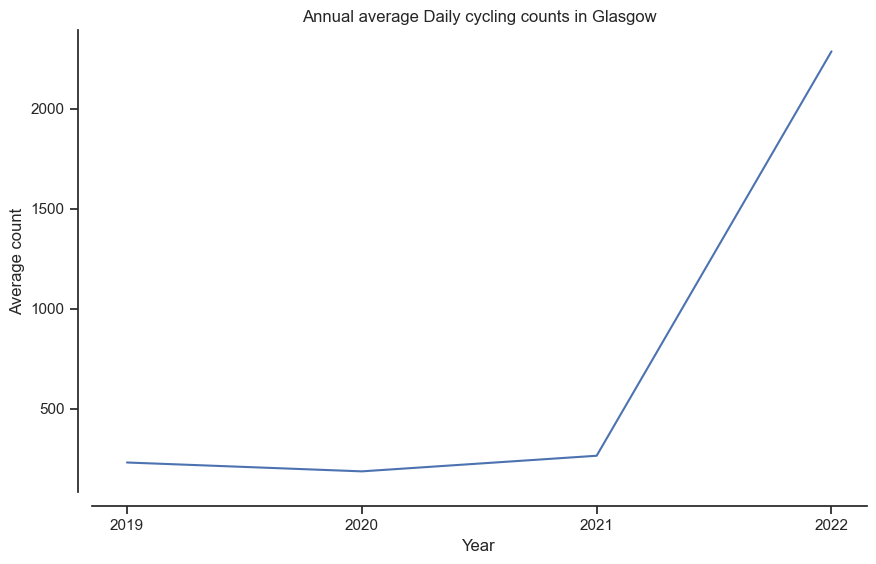

In [148]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set()
sns.set_style('ticks')
sns.lineplot(x= 'year', y= 'count', data= df_year)
ax.set_title('Annual average Daily cycling counts in Glasgow')
ax.set_xlabel('Year')
ax.set_ylabel('Average count')
sns.despine(offset=10, trim=False)
ax.xaxis.set_ticks(np.arange(2019, 2023, 1))

The mean daily counts is observed to decrease in 2020 and increase gradually in 2021 but experience a sharp increase in 2022. The post pandemic increase in cycling is attributed to the increased cycling infrastructure within Glasgow. return to 'normalcy, and due to habit. The theory of planned behaviour states that an individual's behaviour is influenced by their attitude towards that particular action. Many contemporary research has shown that active travel increased during the COVID-19 pandemic. This induced need for cycling as a recreational and alternative mode of travel results in formation of a habit and a new attitude towards cycling as transport and thus explains the increased average daily counts. A norm can directly influence attitude as both have a significant relationship with each other. As the positive support for cycling increased, from other persons and organizations, people's attitude also became more positive.

#### Monthly cycling distribution

In [107]:
monthly_df= df.groupby(['year', 
               'month', 
               'monthName']).agg({'count': sum})
monthly_df['YM'] =monthly_df.index
monthly_df


count                    YM
year month monthName                                
2019 1     January      266441    (2019, 1, January)
     2     February     285853   (2019, 2, February)
     3     March        318016      (2019, 3, March)
     4     April        341406      (2019, 4, April)
     5     May          368540        (2019, 5, May)
     6     June         391294       (2019, 6, June)
     7     July         430804       (2019, 7, July)
     8     August       422028     (2019, 8, August)
     9     September    376861  (2019, 9, September)
     10    October      391602   (2019, 10, October)
     11    November     344645  (2019, 11, November)
     12    December     225644  (2019, 12, December)
2020 1     January      285147    (2020, 1, January)
     2     February     239855   (2020, 2, February)
     3     March        262983      (2020, 3, March)
     4     April        272088      (2020, 4, April)
     5     May          391362        (2020, 5, May)
     6     June         388218       (2020, 6, June)
     7     July         367402       (2020, 7, July)
     8     August       387631     (2020, 8, August)
     9     September    420615  (2020, 9, September)
     10    October      377504   (2020, 10, October)
     11    November     316640  (2020, 11, November)
     12    December     214050  (2020, 12, December)
2021 1     January      170189    (2021, 1, January)
     2     February     190965   (2021, 2, February)
     3     March        370258      (2021, 3, March)
     4     April        551030      (2021, 4, April)
     5     May          531351        (2021, 5, May)
     6     June         766584       (2021, 6, June)
     7     July         865785       (2021, 7, July)
     8     August       837542     (2021, 8, August)
     9     September    881701  (2021, 9, September)
     10    October      794800   (2021, 10, October)
     11    November     809144  (2021, 11, November)
     12    December     524406  (2021, 12, December)
2022 1     January    12692864    (2022, 1, January)
     2     February   15004046   (2022, 2, February)
     3     March      13147059      (2022, 3, March)
     4     April       7688373      (2022, 4, April)
     5     May         2059432        (2022, 5, May)
     6     June        4622079       (2022, 6, June)
     7     July        1842475       (2022, 7, July)
     8     August      2138841     (2022, 8, August)
     9     September   1523958  (2022, 9, September)
     10    October     1146564   (2022, 10, October)
     11    November     892858  (2022, 11, November)
     12    December    2047651  (2022, 12, December)

In [108]:
monthly_df=monthly_df.reset_index()

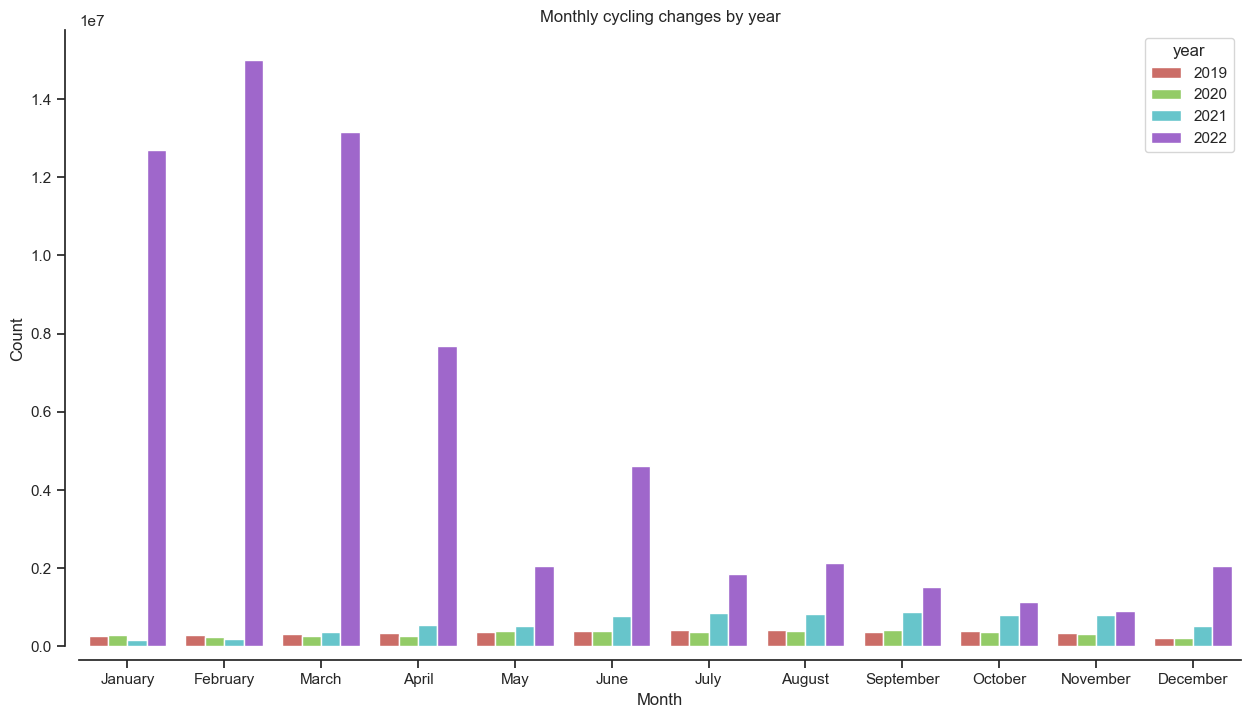

In [109]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('ticks')
palette= sns.color_palette("hls", 4)
sns.barplot(x='monthName',
            y='count',
            data=monthly_df[['monthName','count','year']],hue='year',
           palette= palette)
sns.set(style= 'dark')
ax.set_title('Monthly cycling changes by year')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
for item in ax.get_xticklabels():
    item.set_rotation(90)
sns.despine(offset=10, trim=False)
plt.show()

Throughout the months, it is evident that the year 2022 experienced a significantly higher volume of cyclists as compared to other years.The increase, however, decreases gradually through the months from January. Pre pandemic year, 2019, shows more or less consistent cycling counts with 2020 having fluctuations through the different months as a result of the phased restriuctions.

#### Cycling distribution by season

In [110]:
season_df= df.groupby(['year', 
               'season']).agg({'count': sum})
season_df['YS'] =season_df.index
season_df

count              YS
year season                          
2019 autumn   1031318  (2019, autumn)
     spring   1083888  (2019, spring)
     summer   1268866  (2019, summer)
     winter    779062  (2019, winter)
2020 autumn    961495  (2020, autumn)
     spring   1014944  (2020, spring)
     summer   1171945  (2020, summer)
     winter    775111  (2020, winter)
2021 autumn   2221653  (2021, autumn)
     spring   1720536  (2021, spring)
     summer   2632791  (2021, summer)
     winter    718775  (2021, winter)
2022 autumn   4103309  (2022, autumn)
     spring  16688161  (2022, spring)
     summer   6231809  (2022, summer)
     winter  37782921  (2022, winter)

In [111]:
season_df= season_df.reset_index()

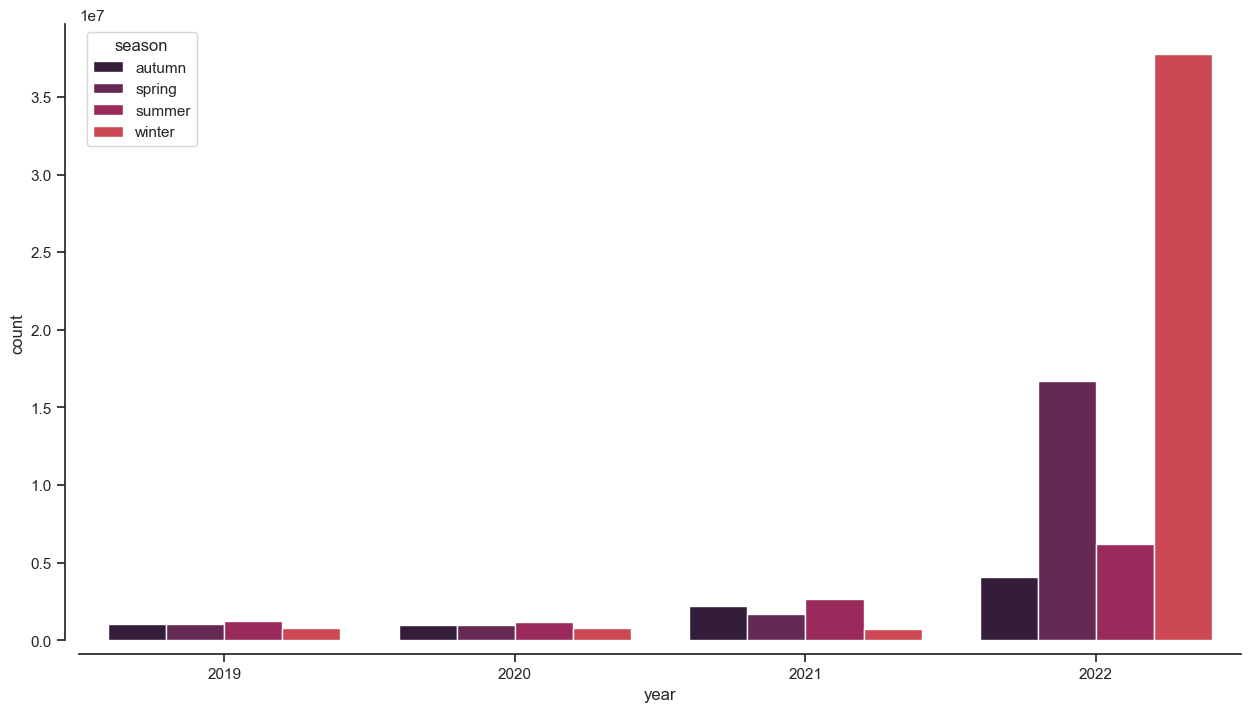

In [112]:
plt.figure(figsize=(15,8))
sns.set_style('ticks')
palette= sns.color_palette('rocket')
sns.barplot(x='year',
            y='count',
            data=season_df[['season','count','year']],hue='season',
           palette= palette)
sns.set(style= 'dark')
ax.set_title('Cycling counts by season')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.despine(offset=10, trim=False)
plt.show()

There are seasonal variations in cycle volume in Glasgow pre and and post covid-19. Winter is observed to recoed the lowest cycle volumes between 2019 1nd 2021. Winter is characterized by cold temperatures, icy roads and snow and these environmental conditions deter individuals from cycling thus the low cycle counts observed between 2019 and 2021. Summer, on the other hand, is warm and thus incentivizes people to cycle more either for recreation or commuting. Overall, the year 2022 has experienced increased cycling over all the four seasons with winter recording the highest volumes. This increase can be partially accounted by the cycling habit and partially by the increased number of cycling counter installation thus capturing more cyclists as compared to previous years.

#### Cycling counts by day of the week

In [113]:
week_df= df.groupby(['year', 'dow', 
               'dayName']).agg({'count': sum})
week_df['YD'] =week_df.index
week_df

count                    YD
year dow dayName                                  
2019 0   Monday       659688     (2019, 0, Monday)
     1   Tuesday      720953    (2019, 1, Tuesday)
     2   Wednesday    700644  (2019, 2, Wednesday)
     3   Thursday     698551   (2019, 3, Thursday)
     4   Friday       637238     (2019, 4, Friday)
     5   Saturday     389981   (2019, 5, Saturday)
     6   Sunday       356079     (2019, 6, Sunday)
2020 0   Monday       554086     (2020, 0, Monday)
     1   Tuesday      577283    (2020, 1, Tuesday)
     2   Wednesday    609577  (2020, 2, Wednesday)
     3   Thursday     615252   (2020, 3, Thursday)
     4   Friday       588192     (2020, 4, Friday)
     5   Saturday     514990   (2020, 5, Saturday)
     6   Sunday       464115     (2020, 6, Sunday)
2021 0   Monday      1014896     (2021, 0, Monday)
     1   Tuesday     1119134    (2021, 1, Tuesday)
     2   Wednesday   1141782  (2021, 2, Wednesday)
     3   Thursday    1103830   (2021, 3, Thursday)
     4   Friday      1122471     (2021, 4, Friday)
     5   Saturday     947223   (2021, 5, Saturday)
     6   Sunday       844419     (2021, 6, Sunday)
2022 0   Monday      8740391     (2022, 0, Monday)
     1   Tuesday     8818771    (2022, 1, Tuesday)
     2   Wednesday  10862323  (2022, 2, Wednesday)
     3   Thursday   10301243   (2022, 3, Thursday)
     4   Friday      9030521     (2022, 4, Friday)
     5   Saturday    8383150   (2022, 5, Saturday)
     6   Sunday      8669801     (2022, 6, Sunday)

In [114]:
week_df= week_df.reset_index()

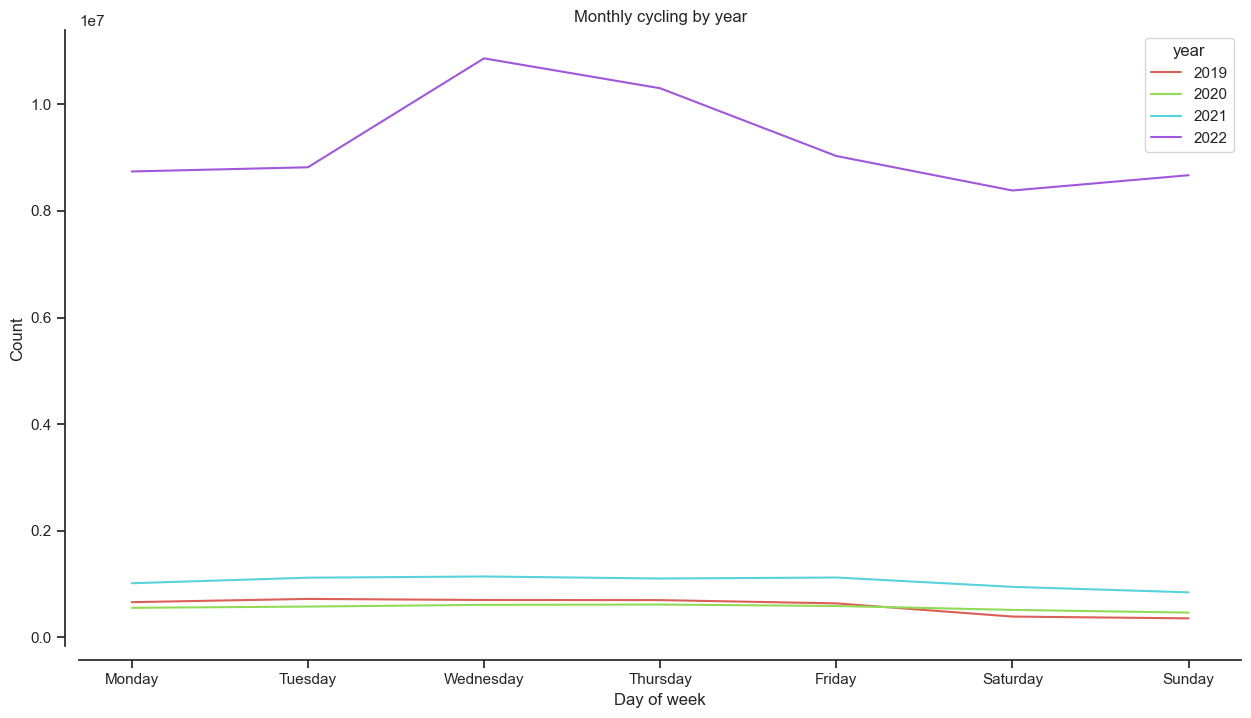

In [115]:
plt.figure(figsize=(15,8))
sns.set_style('ticks')
palette= sns.color_palette("hls", 4)
ax= sns.lineplot(x='dayName',
            y='count',
            data=week_df[['dayName','count','year']],hue='year',
           palette= palette)
sns.set(style= 'dark')
ax.set_title('Monthly cycling by year')
ax.set_xlabel('Day of week')
ax.set_ylabel('Count')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.despine(offset=10, trim=False)
plt.show()

As a mode of transport, cycling is mainly used for recreational and healthy purposes and thus is expected to have high volumes of cyclists on the weekends. For the years, 2019, 2020 and 2021, there seems to have a rather consistent cycling count as compared to 2022. 2022, experienced a sharp increase in cycling counts from past years.

### Relationship between cycling and deprivation index

Deprivation is not only defined by income, unemployment, or level of education but also by social inclusion, being able to participate in the community and being an active member of the local community. According to the Scottish Index of Multiple Deprivation 2020, the local share of Glasgow city’s most deprived is at a staggering 44% (Scottish Government, 2020) with transport deprived datazones majorly situated along the periphery of glasgow. These datazones are mostly rural areas making them bigger than those in urban areas thus experience deprivation differently. The Scottish Government’s, (2020), analysis shows that deprivation problems of transport are very important features of rural deprivation.

In [116]:
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import contextily as ctx

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

import geoplot
import mapclassify as mc

In [117]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf.head()

,provider,area,siteID,location,latitude,longitude,startTime,endTime,count,usmart_id,year,month,day,season,dow,dayName,monthName,geometry
0,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.854410,-4.256008,2019-01-01,02/01/2019,0,e1a836e388eac95a071bc4062156178f,2019,1,1,winter,1,Tuesday,January,POINT (-4.25601 55.85441)
1,Cycling Scotland,Glasgow,GLG0009,"Glasgow, Parson Street",55.865671,-4.237144,2019-01-01,02/01/2019,0,97f19098a5488aac2c5d5adc0b486d1e,2019,1,1,winter,1,Tuesday,January,POINT (-4.23714 55.86567)
2,Cycling Scotland,Glasgow,GLG0015,"Glasgow, Clyde Street",55.853351,-4.247201,2019-01-01,02/01/2019,0,35075798dee7c63a1e2a3522475991d4,2019,1,1,winter,1,Tuesday,January,POINT (-4.24720 55.85335)
3,Cycling Scotland,Glasgow,GLG0032,"Glasgow, Bridgegate",55.854905,-4.247123,2019-01-01,02/01/2019,0,167814a3166a08f3605442dacf0b1b6c,2019,1,1,winter,1,Tuesday,January,POINT (-4.24712 55.85491)
4,Cycling Scotland,Glasgow,GLG0083,"Glasgow, Clyde Tunnel Southbound",55.873020,-4.328700,2019-01-01,02/01/2019,24,69a4715a0b7bcfc98b9e158ecb7bf207,2019,1,1,winter,1,Tuesday,January,POINT (-4.32870 55.87302)


<Axes: >

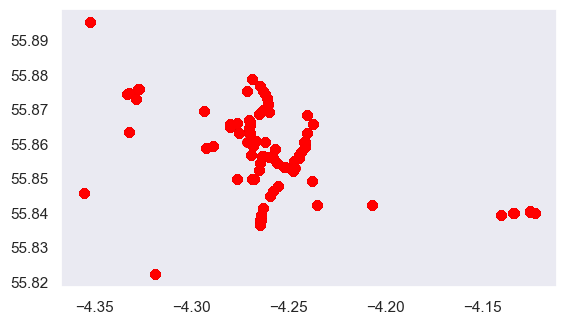

In [118]:
# plotting the counter locations GeoDataFrame
gdf.set_crs(epsg=4326, inplace=True)
gdf.plot(color='red')

In [119]:
simd= gpd.read_file('data/SG_SIMD_2020/SG_SIMD_2020.shp')
simd.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [120]:
simd.head(5)

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry
0,S01006506,Culter - 01,Aberdeen City,894,580,4691,4,7,14,68,...,125,4664.0,87,10,10%,1%,3248.0,11801.872345,4.388802e+06,"POLYGON ((383285.265 800510.607, 383348.492 80..."
1,S01006507,Culter - 02,Aberdeen City,793,470,4862,4,7,14,70,...,128,4602.0,85,4,10%,0%,3486.0,2900.406362,2.217468e+05,"POLYGON ((383527.919 801536.276, 383541.089 80..."
2,S01006508,Culter - 03,Aberdeen City,624,461,5686,5,9,17,82,...,130,4563.5,31,8,5%,1%,5342.0,3468.761949,2.701948e+05,"POLYGON ((383473.000 801227.000, 383597.000 80..."
3,S01006509,Culter - 04,Aberdeen City,537,307,4332,4,7,13,63,...,75,5626.0,42,6,7%,1%,4394.5,1647.461389,9.625426e+04,"POLYGON ((383976.659 801182.579, 383984.102 80..."
4,S01006510,Culter - 05,Aberdeen City,663,415,3913,3,6,12,57,...,168,3885.0,50,7,9%,1%,3736.0,3026.111412,1.800766e+05,"POLYGON ((384339.000 801211.000, 384316.510 80..."


Filtering out the Glasgow datazones from the Local Authority name.

In [121]:
simd['LAName'].unique()

array(['Aberdeen City', 'Aberdeenshire', 'Angus', 'Argyll and Bute',
       'Clackmannanshire', 'Dumfries and Galloway', 'Dundee City',
       'East Ayrshire', 'East Dunbartonshire', 'East Lothian',
       'East Renfrewshire', 'City of Edinburgh', 'Na h-Eileanan an Iar',
       'Falkirk', 'Fife', 'Glasgow City', 'Highland', 'Inverclyde',
       'Midlothian', 'Moray', 'North Ayrshire', 'North Lanarkshire',
       'Orkney Islands', 'Perth and Kinross', 'Renfrewshire',
       'Scottish Borders', 'Shetland Islands', 'South Ayrshire',
       'South Lanarkshire', 'Stirling', 'West Dunbartonshire',
       'West Lothian'], dtype=object)

<Axes: >

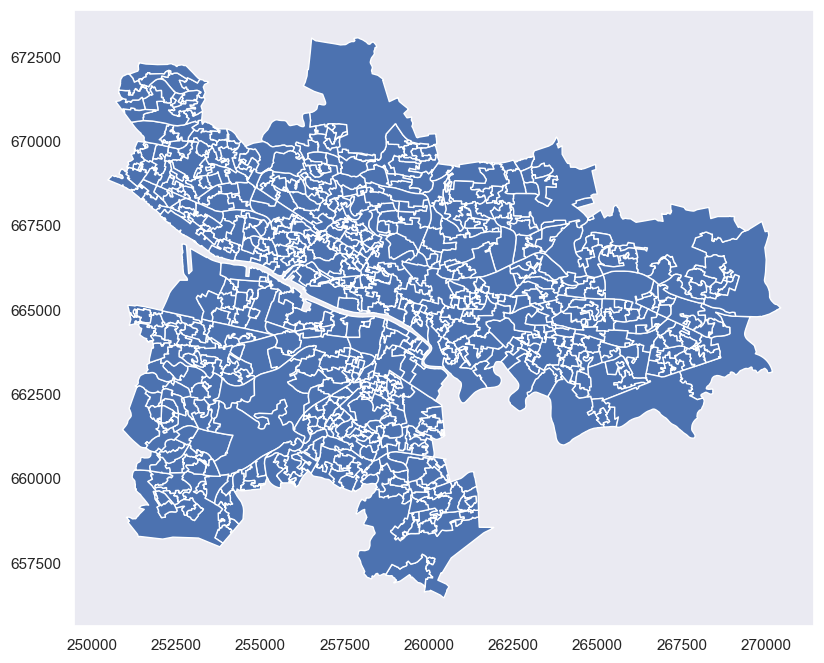

In [122]:
glasgow = simd.loc[simd['LAName']=='Glasgow City']

glasgow.plot(figsize=(12,8))

Location of cycling counters within Glasgow datazones.

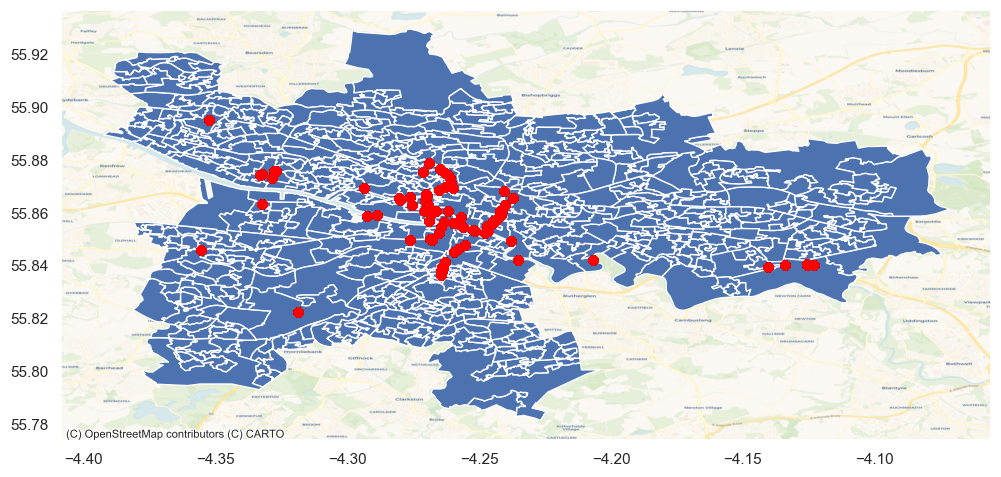

In [123]:
fig, ax = plt.subplots(figsize=(12,8)) 
#Plot the data
glasgow.to_crs(epsg =4326).plot(ax=ax)
gdf.plot(color = 'red',ax=ax)
#Add basemap
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Voyager)

In [124]:
simd_df = gpd.sjoin(gdf,glasgow.to_crs(epsg=4326), how ='inner', predicate ='within')
simd_df.head()

,provider,area,siteID,location,latitude,longitude,startTime,endTime,count,usmart_id,...,CrimeCount,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area
0,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.85441,-4.256008,2019-01-01,02/01/2019,0,e1a836e388eac95a071bc4062156178f,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.1223
5,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.85441,-4.256008,2019-01-02,03/01/2019,0,49445b13e33d8ec383a6e6a1e39d4204,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.1223
10,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.85441,-4.256008,2019-01-03,04/01/2019,0,c267bf618a46ce4d6705ad52539c1f5c,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.1223
15,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.85441,-4.256008,2019-01-04,05/01/2019,0,33a7d44449f37fb25253126d772051a2,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.1223
20,Cycling Scotland,Glasgow,GLG0008,"Glasgow, Portland Bridge",55.85441,-4.256008,2019-01-05,06/01/2019,0,062c6828c3f2829837fc64b3b640a89c,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.1223


(-4.408442440790896, -4.0556822425753305, 55.7738610450961, 55.93705932372532)

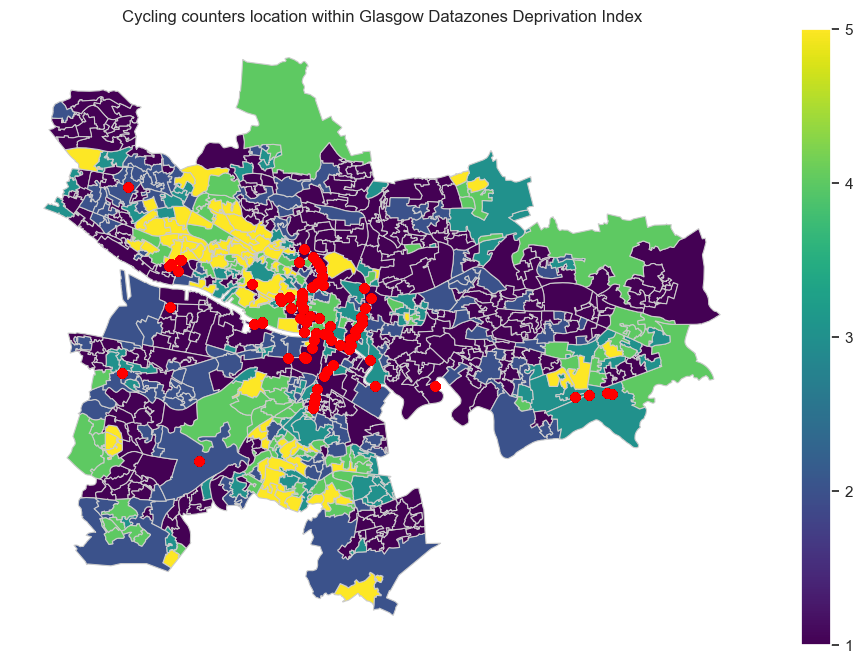

In [125]:
# setting a variable to call the Quntilev2 column to visualise on the map
variable = 'Quintilev2'
# setting the range for the choropleth
vmin, vmax = 1, 5
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 8))

glasgow.to_crs(epsg =4326).plot(column=variable, cmap= 'viridis', 
                                linewidth=0.8, ax=ax, 
                                edgecolor='0.8')
gdf.plot(color = 'red', ax=ax)

ax.set_title('Cycling counters location within Glasgow Datazones Deprivation Index')

sm = plt.cm.ScalarMappable(cmap= 'viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.ax.locator_params(nbins=5)

ax.axis('off')

As shown in the map, the cycling counter locations are focalized within and around the city center with a few on the periphery of Glasgow. The centre of Glasgow serves as the central business district with numerous employment, social and enteratinment opportunities situated here. The road network here therefore is extensive, including cycling lanes for easy accessibility of these opportunities by residents. These thus means more counters as compared to the periphery. The periphery of Glasgow, suburban and peri-urban areas is mostly classified as rural with the road network less extensive.

In [126]:
location_index= simd_df.groupby(['location', 
                 'Quintilev2']).agg({'count':'sum'}).reset_index().sort_values(by='count', ascending= False)
location_index.head()


,location,Quintilev2,count
34,CP Waterloo St / West Campbell St,4,46381328
80,Victoria Bridge,1,11181548
36,CP West Street / Wallace Street,1,1026495
35,CP West Street / Paisley Road,1,1008399
77,Tradeston Bridge (East Side),4,944569


<Axes: title={'center': 'Count of deprivation index of cycling counter locations'}>

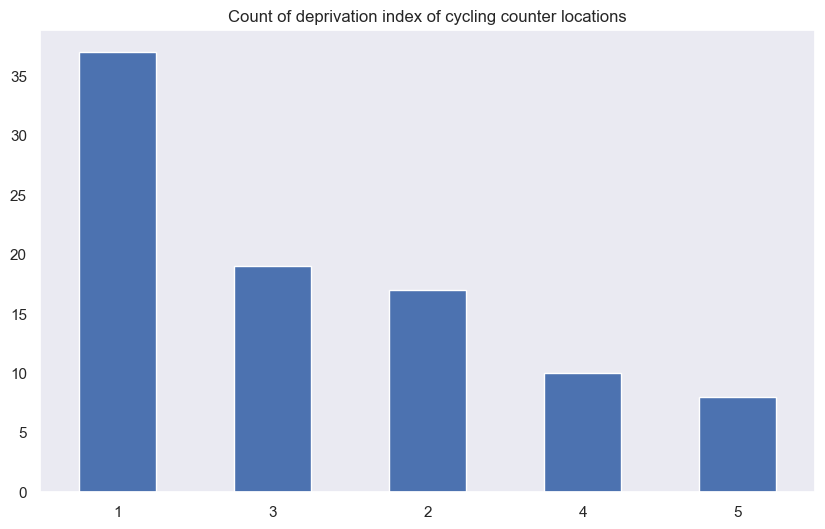

In [127]:
location_index['Quintilev2'].value_counts().plot(kind='bar', figsize=(10,6), 
                                                 title= 'Count of deprivation index of cycling counter locations',
                                                rot=0)

The higher share of cycling volumes is observed in the most deprived datazones in Glasgow. As a result of the pandemic, people shifted to car use for their day to day activities. This was an option for high income earners as they have access to household or individual cars. For most deprived people however, this is a luxury and therefore a more affordable and efficient option is cycling.

In [128]:
x= simd_df.groupby(['year', 
                 'location']).agg({'count':'sum'}).reset_index().sort_values(by='count', ascending= False)
x

,year,location,count
228,2022,CP Waterloo St / West Campbell St,46029793
274,2022,Victoria Bridge,10708126
281,2022,Victoria Road / Cuthbertson Street EXIT (SIGN),419509
280,2022,Victoria Road / Cuthbertson Street ENTRY (SIGN),415034
16,2019,CP West Street / Paisley Road,407525
...,...,...,...
88,2020,Hamilton Road Quarry Entrance (East side) (SIGN),0
78,2020,Garscube Road / Sawmillfield Street (SIGN),0
77,2020,Garscube Road / Oakbank OUT (SIGN),0
76,2020,Garscube Road / Oakbank IN (SIGN),0


In [129]:
top4 = simd_df[(simd_df['location'] == 'CP Waterloo St / West Campbell St') | (simd_df['location'] == 'Victoria Bridge') | 
               (simd_df['location'] == 'Victoria Road / Cuthbertson Street EXIT (SIGN)') | 
               (simd_df['location'] == 'Victoria Road / Cuthbertson Street ENTRY (SIGN)')]
top4

,provider,area,siteID,location,latitude,longitude,startTime,endTime,count,usmart_id,...,CrimeCount,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area
7312,Glasgow City Council,Glasgow,GLG0045,Victoria Bridge,55.85323,-4.251750,2019-01-01,02/01/2019,110,961a7c0115e275fb6e845a7f968f87fe,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.122300
7355,Glasgow City Council,Glasgow,GLG0045,Victoria Bridge,55.85323,-4.251750,2019-01-02,03/01/2019,151,8b11cfec6f293fe27a42b4a836dc0c08,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.122300
7398,Glasgow City Council,Glasgow,GLG0045,Victoria Bridge,55.85323,-4.251750,2019-01-03,04/01/2019,400,4a308833888efad9b4171693b64ad860,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.122300
7441,Glasgow City Council,Glasgow,GLG0045,Victoria Bridge,55.85323,-4.251750,2019-01-04,05/01/2019,439,fa678ab3fe918e103b3c40dffb045cc7,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.122300
7484,Glasgow City Council,Glasgow,GLG0045,Victoria Bridge,55.85323,-4.251750,2019-01-05,06/01/2019,216,7335b08200944396d04ba03aaf61e294,...,193,2283,28.0,124,13,24%,3%,543.0,6315.613692,884133.122300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91143,Glasgow City Council,Glasgow,GLG0262,Victoria Road / Cuthbertson Street ENTRY (SIGN),55.83922,-4.263987,2022-12-21,22/12/2022,859,081ee9a9dc1517179aa5f56e6e08c518,...,45,558,800.0,225,50,31%,7%,167.0,1503.272214,63721.111705
91226,Glasgow City Council,Glasgow,GLG0262,Victoria Road / Cuthbertson Street ENTRY (SIGN),55.83922,-4.263987,2022-12-22,23/12/2022,1074,3f07bdf79a0008c7e10dde81c7d8032e,...,45,558,800.0,225,50,31%,7%,167.0,1503.272214,63721.111705
91456,Glasgow City Council,Glasgow,GLG0262,Victoria Road / Cuthbertson Street ENTRY (SIGN),55.83922,-4.263987,2022-12-25,26/12/2022,210,bdc4c5caed597fe65709738b9c779121,...,45,558,800.0,225,50,31%,7%,167.0,1503.272214,63721.111705
91537,Glasgow City Council,Glasgow,GLG0262,Victoria Road / Cuthbertson Street ENTRY (SIGN),55.83922,-4.263987,2022-12-26,27/12/2022,269,a5ab825eb875587750cae9fb67293fda,...,45,558,800.0,225,50,31%,7%,167.0,1503.272214,63721.111705


In [130]:
count= top4.groupby(['year', 
               'location']).agg({'count': sum})
count['YL'] =count.index
count

count  \
year location                                                    
2019 Victoria Bridge                                    227216   
2020 CP Waterloo St / West Campbell St                   64884   
     Victoria Bridge                                    120822   
     Victoria Road / Cuthbertson Street ENTRY (SIGN)         0   
     Victoria Road / Cuthbertson Street EXIT (SIGN)          0   
2021 CP Waterloo St / West Campbell St                  286651   
     Victoria Bridge                                    125384   
     Victoria Road / Cuthbertson Street ENTRY (SIGN)    364585   
     Victoria Road / Cuthbertson Street EXIT (SIGN)     364598   
2022 CP Waterloo St / West Campbell St                46029793   
     Victoria Bridge                                  10708126   
     Victoria Road / Cuthbertson Street ENTRY (SIGN)    415034   
     Victoria Road / Cuthbertson Street EXIT (SIGN)     419509   

                                                                                                     YL  
year location                                                                                            
2019 Victoria Bridge                                                            (2019, Victoria Bridge)  
2020 CP Waterloo St / West Campbell St                        (2020, CP Waterloo St / West Campbell St)  
     Victoria Bridge                                                            (2020, Victoria Bridge)  
     Victoria Road / Cuthbertson Street ENTRY (SIGN)  (2020, Victoria Road / Cuthbertson Street ENTR...  
     Victoria Road / Cuthbertson Street EXIT (SIGN)   (2020, Victoria Road / Cuthbertson Street EXIT...  
2021 CP Waterloo St / West Campbell St                        (2021, CP Waterloo St / West Campbell St)  
     Victoria Bridge                                                            (2021, Victoria Bridge)  
     Victoria Road / Cuthbertson Street ENTRY (SIGN)  (2021, Victoria Road / Cuthbertson Street ENTR...  
     Victoria Road / Cuthbertson Street EXIT (SIGN)   (2021, Victoria Road / Cuthbertson Street EXIT...  
2022 CP Waterloo St / West Campbell St                        (2022, CP Waterloo St / West Campbell St)  
     Victoria Bridge                                                            (2022, Victoria Bridge)  
     Victoria Road / Cuthbertson Street ENTRY (SIGN)  (2022, Victoria Road / Cuthbertson Street ENTR...  
     Victoria Road / Cuthbertson Street EXIT (SIGN)   (2022, Victoria Road / Cuthbertson Street EXIT...

In [131]:
count= count.reset_index()

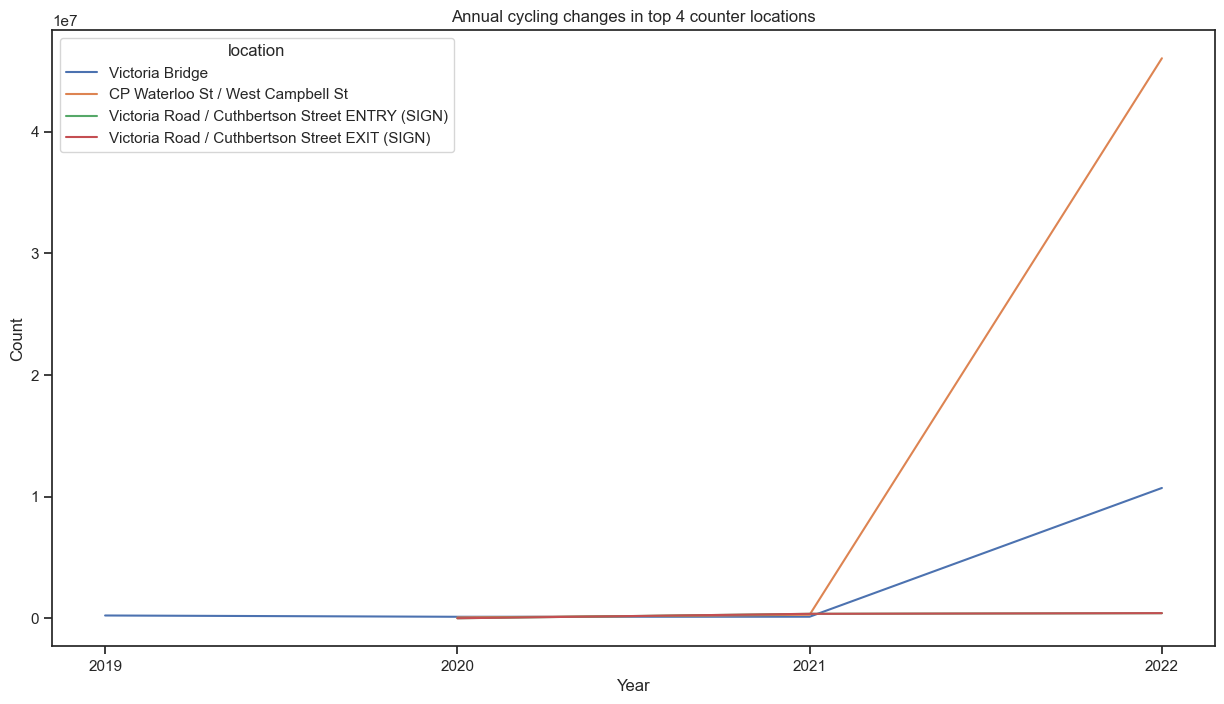

In [159]:
plt.subplots(figsize=(15,8))
sns.set_style('ticks')
ax= sns.lineplot(x='year',
            y='count',
            data=count[['location','count','year']],hue='location')
sns.set(style= 'white')
ax.set_title('Annual cycling changes in top 4 counter locations')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.xaxis.set_ticks(np.arange(2019, 2023, 1))
plt.show()

The data shows that only Victoria Bridge counter was the only counter among the top four that was operational. The city has ambitious targets for cycling and is investing heavily in cycling infrastructure. Cycling counters make an interesting case for good quality evidence of where cycling occurs and where it might occur. This implies that as at 2019, only Victoria bridge counter had been installed with the rest starting operations in 2020 or being down for maintenance. Victoria bridge and CP Waterloo St / West Campbell St counters experienced a sharp increase in cycling volumes post pandemic with the latter having a steeper increase. 

In [133]:
top4_gdf = gpd.GeoDataFrame(
    top4, geometry=gpd.points_from_xy(top4['longitude'], top4['latitude']))

(-4.408442440790896, -4.0556822425753305, 55.7738610450961, 55.93705932372532)

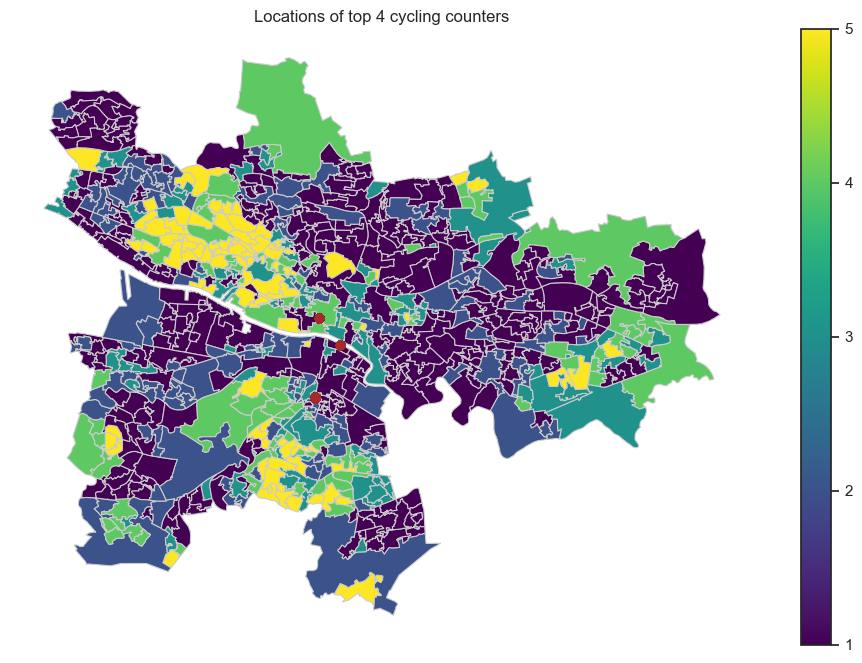

In [134]:
# setting a variable to call the Quntilev2 column to visualise on the map
variable = 'Quintilev2'
# setting the range for the choropleth
vmin, vmax = 1, 5
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 8))

glasgow.to_crs(epsg =4326).plot(column=variable, cmap= 'viridis', 
                                linewidth=0.8, ax=ax, 
                                edgecolor='0.8')
top4_gdf.plot(color = 'brown', ax=ax)

ax.set_title('Locations of top 4 cycling counters')

sm = plt.cm.ScalarMappable(cmap= 'viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.ax.locator_params(nbins=5)

ax.axis('off')

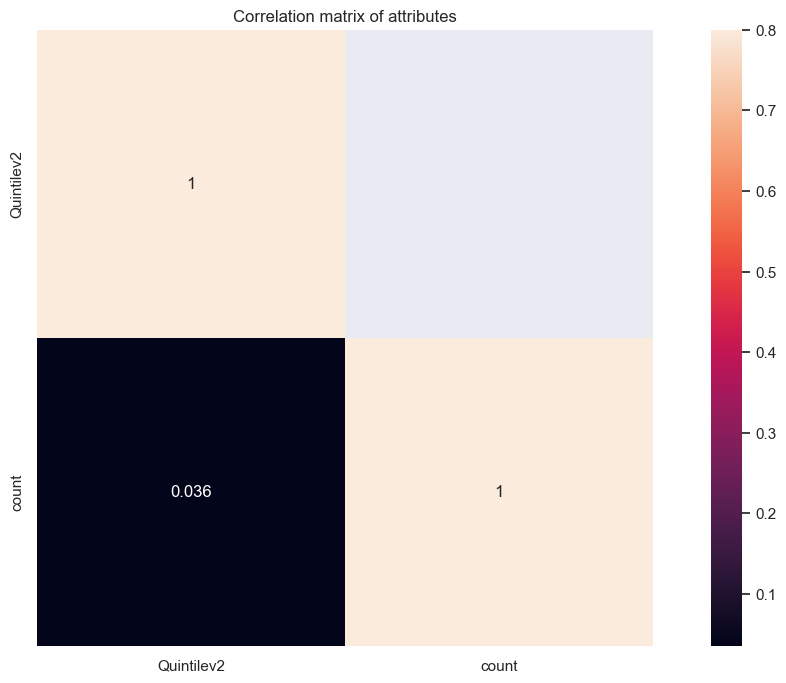

In [154]:
#Create the correlation matrix
correMtr=simd_df[['Quintilev2', 'count']].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix between cycling count and deprivation index')
plt.show()

In [160]:
from scipy.stats import f_oneway
 
CategoryGroupLists=simd_df.groupby('Quintilev2')['count'].apply(list)
 
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  3.2427648447462753e-88


Assumption (H0) is that cycling counts and deprivation index are not correlated. The ANOVA test shows a p < 0.05 thus we reject our null hypothesis. Following this, the heatmap shows a positive correlation between cycling counts and deprivation index. Implies that as deprivation increases, so doe cycling volume. Access to transport comes as an impedance, cost. Cost of car ownership, public transport, etc. Most deprived datazones have low income earners thus cannot afford these costs. The alternative is cycling which is more affordable with less maintenance cost involved and thus bicycle ownership is expected.

In [161]:
heat = pd.DataFrame(monthly_df)
temp = heat.pivot('year','month','count')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23984\3961023798.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  temp = heat.pivot('year','month','count')


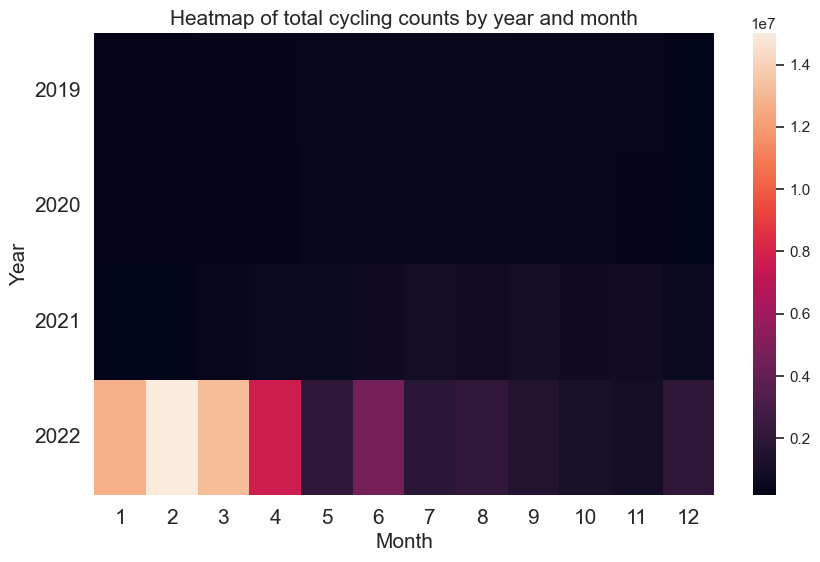

In [162]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(temp)
ax.set_title('Heatmap of total cycling counts by year and month', fontsize=15)
ax.set_ylabel('Year', fontsize=15)
ax.set_xlabel('Month', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yticks(rotation=0)
plt.show()

In conclusion, the heatmap shows how cycling volumes have changed over the years and the different months, 2019 and 2020 had low cycling counts but this has changed with cycling counts increasing in 2021 through to 2022.

## Conclusion 

The impact of Covid-19 on travel behaviour cannot be undermined. The social distancing requirements, work from home orders and restrictions influenced the people's attitudes and preference towards alternative new modes of transportation. Cycling as a mode of transport is not only sustainable and environment friendly, but also enhances active and healthy living. The time series analysis of cycling in Glasgow shows that the cycling levels are well above the cyling levels pre-pandemic.

Schönfelder and Axhausen (2010) argue that daily travel patterns are derived from habit and routine, and this is in resonance Schneider's (2013) theory of routine mode-choice decisions, which states that daily travel decisions are predominantly influenced by habit and routine. As people had used cycling for transport during the pandemic, for recreational and commuting purposes, they developed a habit and thus kept up eith this habit post pandemic which has seen higher cycling volumes.

Subsequently, the policies that have been put forth to encourage cycling have incentivized cycling. There is more infrastructural investment including lane segregation which encouraged not only expert cyclists but beginner cyclists as well due to reduced level of traffic stress. 

Deprivation influences accessibility to transport and the alternatives available. There is observed positive correlation between cycling counts and deprivation quintile. 

This analysis, has its limitations. For instance, most of the counter locations do not have data dating back beyong 202o thus proves difficult to develop a trendline of how covid-19 influenced cycling. Additionally, despite the installation of these counters, they are not uniformly distributed within Glasgow as most of them are within the city centre and it vicinity. These therefore does not paint attru picture of cycling levels in the different datazones. Weather influences travel patterns and thus further study factoring weather would be beneficial in explaining cause of the traffic changes.

## References

Banister, D. (2008). The sustainable mobility paradigm. Transport Policy, 15(2), 73–80. https://doi.org/10.1016/j.tranpol.2007.10.005

Glasgow City Council. (2018). Avenues. https://www.glasgow.gov.uk/avenues

Hickman, R. (2013). Transport, climate change and society. In Imagining the Future City: London 2062 (pp. 55–62). Ubiquity Press. https://doi.org/10.5334/bag.h

SusTrans. (2015). Glasgow’s Strategic Plan for Cycling 2016-2025. www.glasgow.gov.uk/cyclingwww.glasgow.gov.uk/cycling

Transport Scotland. (2014). A Long-term Vision for Active Travel in Scotland 2030.

Transport Scotland. (2019). Scottish Transport Statistics - No 37. www.devlinphoto.com

UITP. (2015). Mobility in Cities Database-Synthesis Report.

United Nations. (2015). The 2030 Agenda for Sustainable Development.

World Health Organization. (2016). Global report on urban health : equitable, healthier cities for sustainable development.

Schneider, R.J., 2013. Theory of routine mode choice decisions: An operational framework to increase sustainable transportation. Transp Policy (Oxf) 25, 128–137. https://doi.org/10.1016/j.tranpol.2012.10.007

Schönfelder, Stefan., Axhausen, K.W., 2010. Urban rhythms and travel behaviour : spatial and temporal phenomena of daily travel. Ashgate.

